<a href="https://colab.research.google.com/github/miankhan143/AI-Lab/blob/main/MIAN_KHAN_FA21_BAI_038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#TASK 1: NAIVE BAYES CLASSIFIER
# Step 1: Load the Iris dataset using scikit-learn

#import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#Step 2: Preprocess the data by splitting it into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Implement a Naive Bayes classifier


In [16]:
classifier = GaussianNB()

# Step 4: Train the classifier on the training data

In [17]:
classifier.fit(X_train, y_train)

GaussianNB()

# Step 5: Evaluate the classifier's performance on the testing data

In [18]:
y_pred = classifier.predict(X_test)

# Calculate accuracy

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


# Generate a confusion matrix

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


# Step 6: Plot the decision boundary (Not applicable for Naive Bayes)
Naive Bayes doesn't have a decision boundary.


# Task 2: Linear Regression
1. Load the chosen dataset (you can use a built-in dataset or find one online).

In [47]:
import pandas as pd

url = 'https://github.com/ywchiu/riii/raw/master/data/house-prices.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

# 2. Preprocess the data:

Handle Missing Values:

You have to handle missing values by filling them with appropriate values, like the mean or median of the column.

In [55]:
# Fill missing values with the mean of the column
import pandas as pd
columns_with_missing = df.columns[df.isnull().any()].tolist()
mean_values = df[columns_with_missing].mean()
df.fillna(mean_values, inplace=True)
# Select numeric columns for scaling
numeric_columns = df.select_dtypes(include=['number'])

Feature Scaling:

Scaling features can help improve the performance of linear regression. You can use the StandardScaler from scikit-learn for this purpose.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# 3. Implement a simple linear regression model:

In [57]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()


Split the dataset into training and testing sets

In [60]:
from sklearn.model_selection import train_test_split
import numpy as np
# Define features (X) and target (y)
X = df_scaled.iloc[:, :-1]  # All columns except the last one as features
y = df_scaled.iloc[:, -1]   # The last column as the target

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train the linear regression model on the training data:

In [61]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

Evaluate the model's performance:

Mean Absolute Error (MAE):
python

In [62]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.6442128633465919


Mean Squared Error (MSE):

In [63]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5963674746840261


Visualize the linear regression line and the data points:

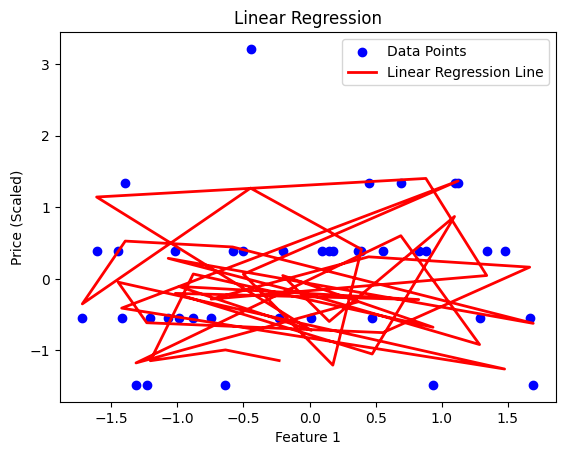

In [67]:
import matplotlib.pyplot as plt

X_test_np = X_test.values
y_pred_np = y_pred

# Plot the linear regression line
plt.scatter(X_test_np[:, 0], y_test, color='blue', label='Data Points')
plt.plot(X_test_np[:, 0], y_pred_np, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Feature 1')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.title('Linear Regression')
plt.show()


# Task 3: Decision Tree Classifier
Dataset: The "Breast Cancer" dataset, available in scikit-learn

In [68]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.tree import plot_tree

Load the Breast Cancer dataset using scikit-learn

In [69]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0 for malignant, 1 for benign)

Preprocess the data by splitting it into training and testing sets

In [70]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Implement a Decision Tree classifier

In [72]:
classifier = DecisionTreeClassifier(random_state=42)

Train the classifier on the training data

In [73]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluate the classifier's performance

In [74]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9415204678362573


Precision

In [75]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9711538461538461


Recall

In [76]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9351851851851852


ROC curve and AUC

In [77]:
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

AUC: 0.9437830687830687


Plot ROC curve

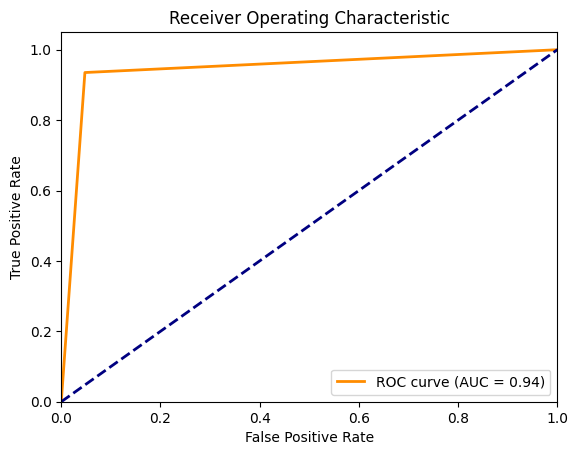

In [78]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Visualize the decision tree structure

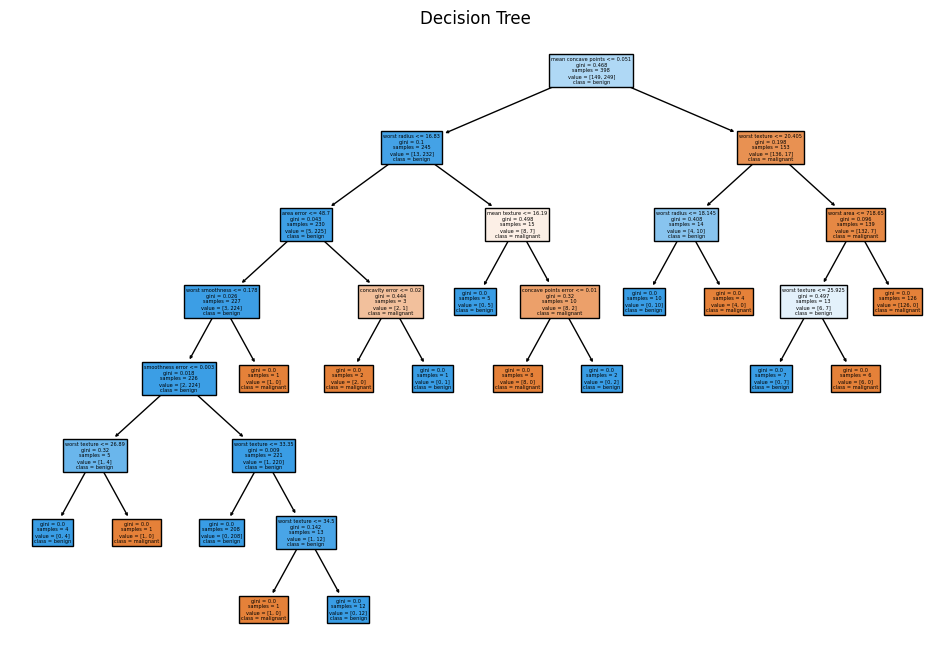

In [79]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree")
plt.show()

# Task 4: Logistic Regression
1. Import necessary libraries and the Titanic Dataset from a reliable resource. I imported it from github
2. Preprocess the data, including handling missing values and one-hot encoding categorical
variables.
3. Implement a Logistic Regression model.
4. Split the dataset into training and testing sets.
5. Train the Logistic Regression model on the training data.
6. Evaluate the model's performance using metrics such as accuracy, precision, recall, and an
ROC curve.
7. Perform feature importance analysis.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8097014925373134
Precision: 0.7941176470588235
Recall: 0.7297297297297297
AUC: 0.8803006828484536
Confusion Matrix:
[[136  21]
 [ 30  81]]


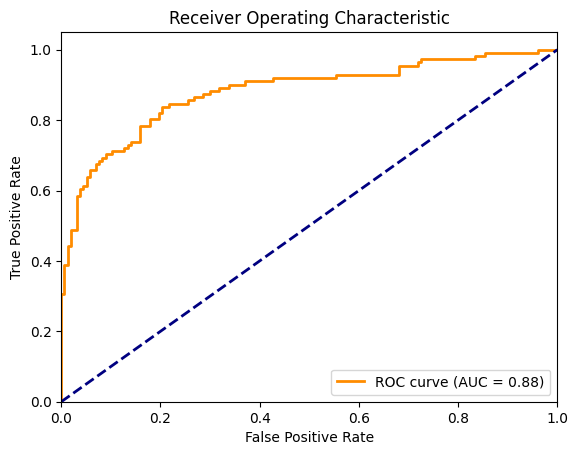

Feature Importance (Coefficients):
      Feature  Coefficient
6  Embarked_Q     0.003183
4        Fare     0.002839
1         Age    -0.033049
3       Parch    -0.078045
2       SibSp    -0.265199
7  Embarked_S    -0.485195
0      Pclass    -0.916512
5    Sex_male    -2.465927
Selected Features (SelectFromModel):
Index(['Pclass', 'Sex_male'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# Step 1: Import necessary libraries and load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 2: Preprocess the data
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Select relevant features and target variable
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Step 3: Implement a Logistic Regression model
model = LogisticRegression()

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the Logistic Regression model on the training data
model.fit(X_train, y_train)

# Step 6: Evaluate the model's performance
# Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Step 7: Perform feature importance analysis
# Feature Importance using coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Feature Importance (Coefficients):")
print(feature_importance)

# Feature Importance using SelectFromModel
sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)
selected_features = X.columns[sfm.get_support()]
print("Selected Features (SelectFromModel):")
print(selected_features)

